In [28]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.discriminant_analysis as da
from sklearn.metrics import confusion_matrix, classification_report, precision_score



https://github.com/hyunblee/ISLR-with-Python/blob/master/Ch4-Classification/Ch4_Logistic_Regression.ipynb

# 4.6.1 The stock market data 

In [2]:
df = pd.read_csv('Smarket.csv', index_col=0)
df.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0.59700     1.641675     0.596750  
max       5.73300     3.152470     5.733000

In [3]:
import statsmodels.formula.api as smf

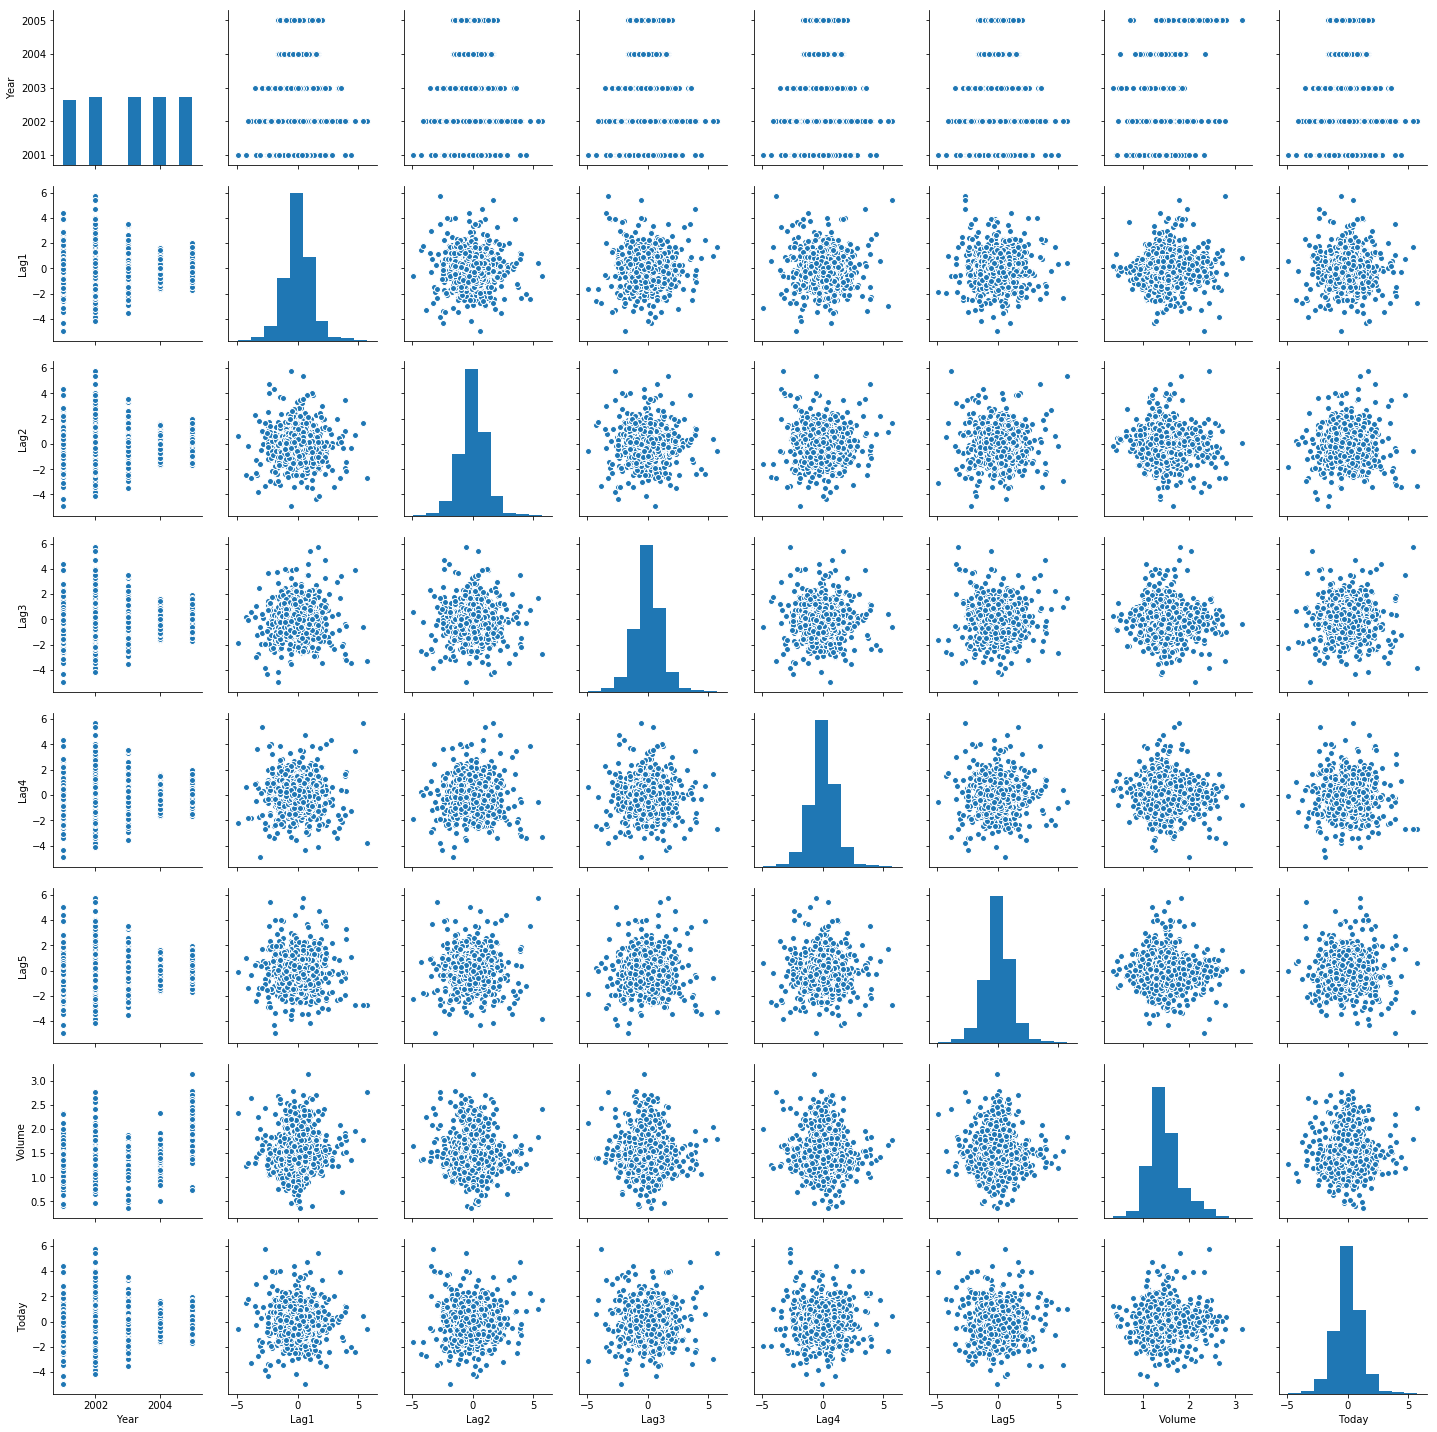

In [4]:
sns.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 137.7+ KB


In [6]:
#plotting the correlation maxtrix 
df.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000

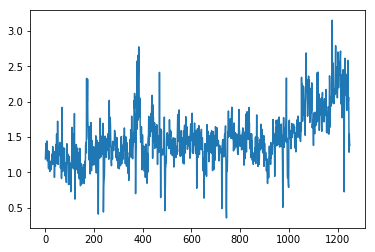

In [7]:
plt.plot(df.Volume)


(-50, 1312.4551949005768)

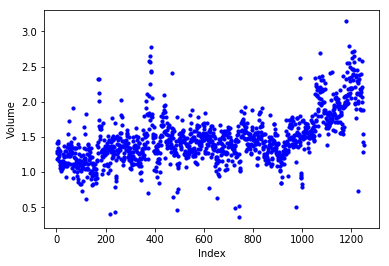

In [8]:
plt.scatter(x=df.index, y=df.Volume, marker='o', c='blue', s=10) 
plt.xlabel('Index')
plt.ylabel("Volume")
plt.xlim(xmin=-50)

# 4.6.2 Logistic regressions

The ${\tt glm()}$ function fits generalized linear models, a class of models that includes logistic regression. The syntax of the ${\tt glm()}$ function is similar to that of ${\tt lm()}$, except that we must pass in the argument ${\tt family=sm.families.Binomial()}$ in order to tell ${\tt R}$ to run a logistic regression rather than some other type of generalized linear model.

In [9]:
formula = 'Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume'

glm_model = smf.glm(formula = formula ,data = df ,family = sm.families.Binomial())
result = glm_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sat, 21 Apr 2018   Deviance:                       1727.6
Time:                                          15:53:04   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

or there we can use the LogisticRegression from scikit learn too

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
df.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

Since the Direction columns is a catergorical variable,we have to convert it into a numerical variable by creating dummies variable (0 and 1) by using get_dummies 

In [12]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  Direction_Up
1  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959             1
2  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032             1
3  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623             0
4  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614             1
5  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213             1

In [13]:
X = df_dummies.loc[:,'Lag1':'Volume']
Y = df_dummies['Direction_Up']
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#print out the intercept and list of coefficient
print ("Coefficient", logreg.intercept_)
list(zip(X.columns, logreg.coef_[0]) )         # coefficients


Coefficient [-0.12107884]


[('Lag1', -0.07284382332761141),
 ('Lag2', -0.04223527443392861),
 ('Lag3', 0.011016099836884539),
 ('Lag4', 0.00928363665107681),
 ('Lag5', 0.01026344907442796),
 ('Volume', 0.13210836866756276)]

In [15]:
list(zip(X.index ,logreg.predict_proba(X=X)[:20,1]))# take a look at the probability of first 20 variable

[(1, 0.5073437046486302),
 (2, 0.48174499259329334),
 (3, 0.4812980838785386),
 (4, 0.5153494899736935),
 (5, 0.5109913998592838),
 (6, 0.5070647038303314),
 (7, 0.49274928196958434),
 (8, 0.5092790175182677),
 (9, 0.5178331612231708),
 (10, 0.4890946117467889),
 (11, 0.4966888292135751),
 (12, 0.519923608194238),
 (13, 0.5185694824567116),
 (14, 0.4967612474196897),
 (15, 0.48682209496807094),
 (16, 0.5154944304445114),
 (17, 0.5056954698664821),
 (18, 0.5321847369538858),
 (19, 0.5170866170605802),
 (20, 0.49869895802375724)]

In [16]:
#now we come to the prediction part of 
Y_class_pred = logreg.predict(X=X)
print(Y_class_pred)

[1 0 0 ... 1 1 1]


Now we can see that the prediction output is in a form of a list with 0 or 1 as UP and DOWN. Now we will use the sum function to see how many days it has the UP

In [17]:
Y_class_pred.sum()


965

Hence out of 1250 days, our algorithm predicts 965 days of UP movement

In [18]:
#Accuracy
(Y == Y_class_pred).mean()


0.5208

In order to better assess the ac-
curacy of the logistic regression model in this setting, we can fit the model
using part of the data, and then examine how well it predicts the held out
data. This will yield a more realistic error rate, in the sense that in prac-
tice we will be interested in our model’s performance not on the data that
we used to fit the model, but rather on days in the future for which the
market’s movements are unknown.To implement this strategy, we will first create a vector corresponding
to the observations from 2001 through 2004. We will then use this vector
to create a held out data set of observations from 2005.

In [19]:
train_filter = df_dummies['Year'] <2005
X_train = df_dummies.loc[train_filter, 'Lag1':'Volume']
Y_train = df_dummies.loc[train_filter, 'Direction_Up']

X_test = df_dummies.loc[~train_filter, 'Lag1':'Volume'] #~train_filer get all the False column i.e greater than 2005
Y_test = df_dummies.loc[~train_filter, 'Direction_Up']

~train_filter.head()

logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
#Now we predict the probability of the test set 
Y_test_pred_prob = logreg.predict_proba(X=X_test)
print(type(Y_test_pred_prob))
Y_test_pred_prob[0:10] #slicing the first 10 pairs 
 # [ 0.47268383,  0.52731617] -> [ prob_of_0,  prob_of_1 ]

<class 'numpy.ndarray'>


array([[0.47268383, 0.52731617],
       [0.48411655, 0.51588345],
       [0.4768594 , 0.5231406 ],
       [0.48564818, 0.51435182],
       [0.50140487, 0.49859513],
       [0.4987675 , 0.5012325 ],
       [0.49705756, 0.50294244],
       [0.49023419, 0.50976581],
       [0.4956978 , 0.5043022 ],
       [0.48913516, 0.51086484]])

In [22]:
Y_test_pred = logreg.predict(X=X_test)
Y_test_pred[0:5]

array([1, 1, 1, 1, 0], dtype=uint8)

In [23]:
(Y_test == Y_test_pred).mean()

0.48412698412698413

# 4.6.3 Linear Discriminant Analysis

In [24]:
df3 = pd.read_csv('Smarket.csv', usecols=range(1, 10), index_col=0, parse_dates=True)
df3.head()

Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
Year                                                                  
2001-01-01  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
2001-01-01  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2001-01-01  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
2001-01-01 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
2001-01-01  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

We fit the model using
only the observations before 2005

In [32]:
X_train2 = df3[:'2004'][['Lag1','Lag2']]
Y_train2 = df3[:'2004']['Direction']

X_test2 = df3['2005':][['Lag1','Lag2']]
Y_test2 = df3['2005':]['Direction']

lda = da.LinearDiscriminantAnalysis()
pred = lda.fit(X_train2, Y_train2).predict(X_test2)

In [26]:
#find out prior probabilities of groups
lda.priors_


array([0.49198397, 0.50801603])

https://github.com/Kulbear/ISLR-Python/blob/master/labs/Chapter%204%20-%20Classification.ipynb

In [33]:
confusion_matrix(Y_test2, pred).T

array([[ 35,  35],
       [ 76, 106]])

In [35]:
print(classification_report(Y_test2, pred, digits=3))


             precision    recall  f1-score   support

       Down      0.500     0.315     0.387       111
         Up      0.582     0.752     0.656       141

avg / total      0.546     0.560     0.538       252



# 4.6.4 Quadratic Discriminant Analysis¶


In [45]:
qda = da.QuadraticDiscriminantAnalysis()
pred2 = qda.fit(X_train2, Y_train2).predict(X_test2)


In [40]:
qda.priors_ #prior probability

array([0.49198397, 0.50801603])

In [41]:
qda.means_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [48]:
confusion_matrix(Y_test2, pred2).T #confusion matrix 


array([[ 30,  20],
       [ 81, 121]])

In [46]:
print(classification_report(Y_test2, pred2, digits=3))


             precision    recall  f1-score   support

       Down      0.600     0.270     0.373       111
         Up      0.599     0.858     0.706       141

avg / total      0.599     0.599     0.559       252

